## YOLOv5

https://github.com/ultralytics/yolov5.git

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 14927 (delta 7), reused 7 (delta 1), pack-reused 14908
Receiving objects: 100% (14927/14927), 14.01 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00


주차공간 데이터셋
https://public.roboflow.com/object-detection/pklot

In [4]:
%mkdir /content/yolov5/pklot
%cd /content/yolov5/pklot


/content/yolov5/pklot


In [5]:
#  curl은 커맨드 아린용 데이터 전송 도구. -L 옵션을 사용하여 HTTP 위치 헤더를 따르기(리다이렉션을 따르도록 curl 을 사용할 수 있음)
!curl -L "https://public.roboflow.com/ds/0DlhqbtuPM?key=gTNyRvPDas" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/labels/2013-04-16_07_45_02_jpg.rf.e428ec70fb7e2a848817466c725bcb04.txt  
 extracting: train/labels/2013-04-16_07_55_02_jpg.rf.a6624571b2833dc996fce24b98eac1fc.txt  
 extracting: train/labels/2013-04-16_08_00_02_jpg.rf.b4b059ed577a72101d500dc8285d8d30.txt  
 extracting: train/labels/2013-04-16_08_05_02_jpg.rf.891be3b531b85840ee7af9d5cb4a467a.txt  
 extracting: train/labels/2013-04-16_08_10_02_jpg.rf.ed972f4caf46e296305c834938b09e7d.txt  
 extracting: train/labels/2013-04-16_08_15_02_jpg.rf.a45f2ababd324f6a461eab73fd61e5fc.txt  
 extracting: train/labels/2013-04-16_08_20_02_jpg.rf.35409a67291d756343c31cac3bc3e0e0.txt  
 extracting: train/labels/2013-04-16_08_25_02_jpg.rf.68ee10dba825ec434be0c3c1efcfdceb.txt  
 extracting: train/labels/2013-04-16_08_30_02_jpg.rf.d1ac2036f74f2acd0f57f1e89b41576a.txt  
 extracting: train/labels/2013-04-16_08_35_02_jpg.rf.5e7ed9679d1245b51788cdfee9dda708.txt  
 extracting: train/labels/201

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source pklot/test/images

detect: weights=['yolov5s.pt'], source=pklot/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-55-g632bf48 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 16.0MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1242 /content/yolov5/pklot/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 640x640 6 cell phones, 13.4ms
image 2/1242 /content/yolov5/pklot/test/images/2012-09-11_16_48_36_jpg.rf.4ecc8c87c61680ccc73edc218a2c8d7d.jpg: 640x640 1 bottle, 5 cell phones, 13.4ms
image 3/1242 /content/yolov5/pklot/test/imag

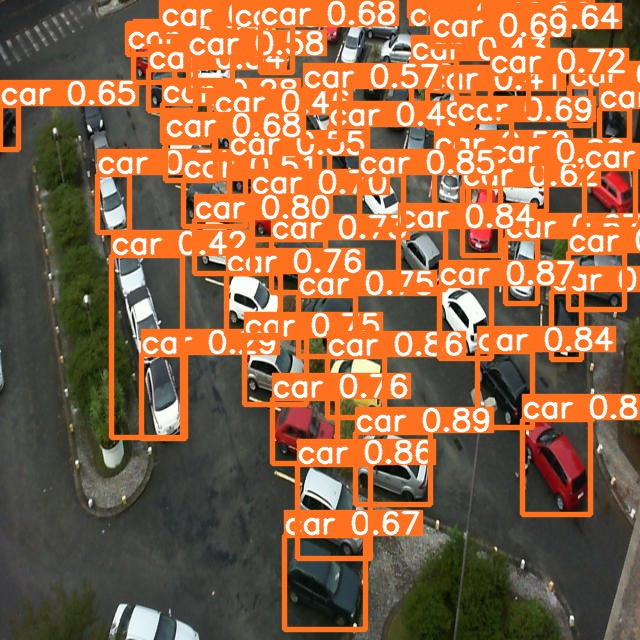

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [6]:
from glob import glob

train_img_list = glob('/content/yolov5/pklot/train/images/*.jpg')
test_img_list= glob('/content/yolov5/pklot/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pklot/valid/images/*.jpg')
print(len(train_img_list), len(test_img_list),len(valid_img_list))

8691 1242 2483


In [7]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [8]:
%cat /content/yolov5/pklot/data.yaml

train: ../train/images
val: ../valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [9]:
%%writetemplate /content/yolov5/pklot/data.yaml
train: ./pklot/train/images
test: ./pklot/test/images
val: ./pklot/valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [ ]:
%cat /content/yolov5/pklot/data.yaml

train: ./pklot/train/images
test: ./pklot/test/images
val: ./pklot/valid/images

nc: 2
names: ['space-empty', 'space-occupied']


In [10]:
# 모델 구성
import yaml
with open('/content/yolov5/pklot/data.yaml','r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
num_classes

'2'

In [11]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [12]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

In [13]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 50 --data ./pklot/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pklot_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pklot/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pklot_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov5/runs/train/pklot_results/

confusion_matrix.png				     results.png
events.out.tfevents.1672489112.79c9793fa193.10874.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
hyp.yaml					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
opt.yaml					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights


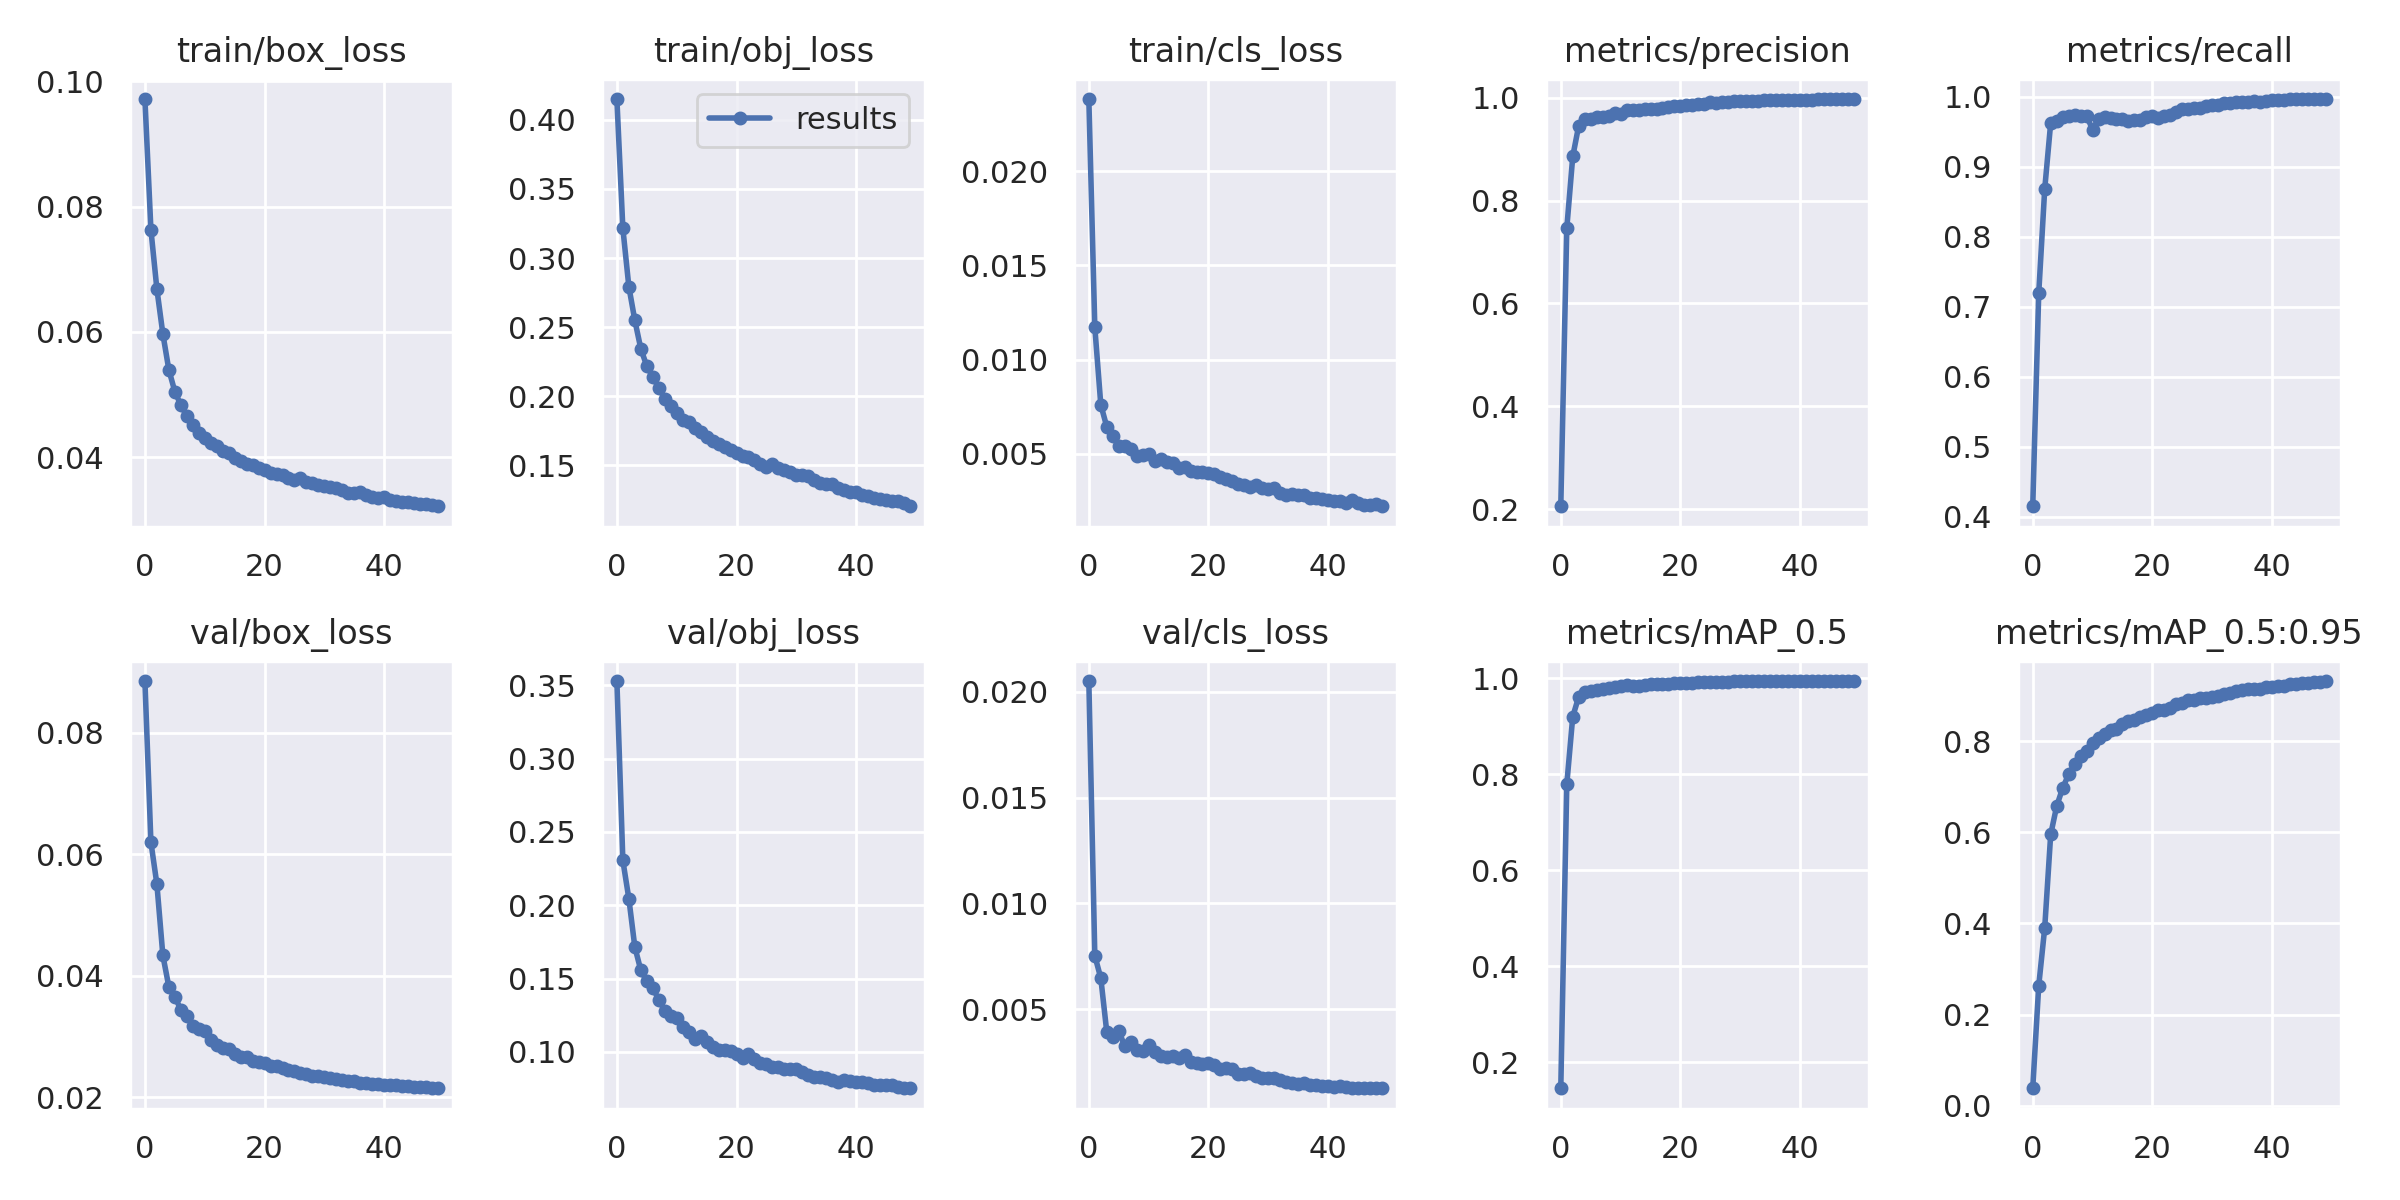

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/results.png',width=1000)

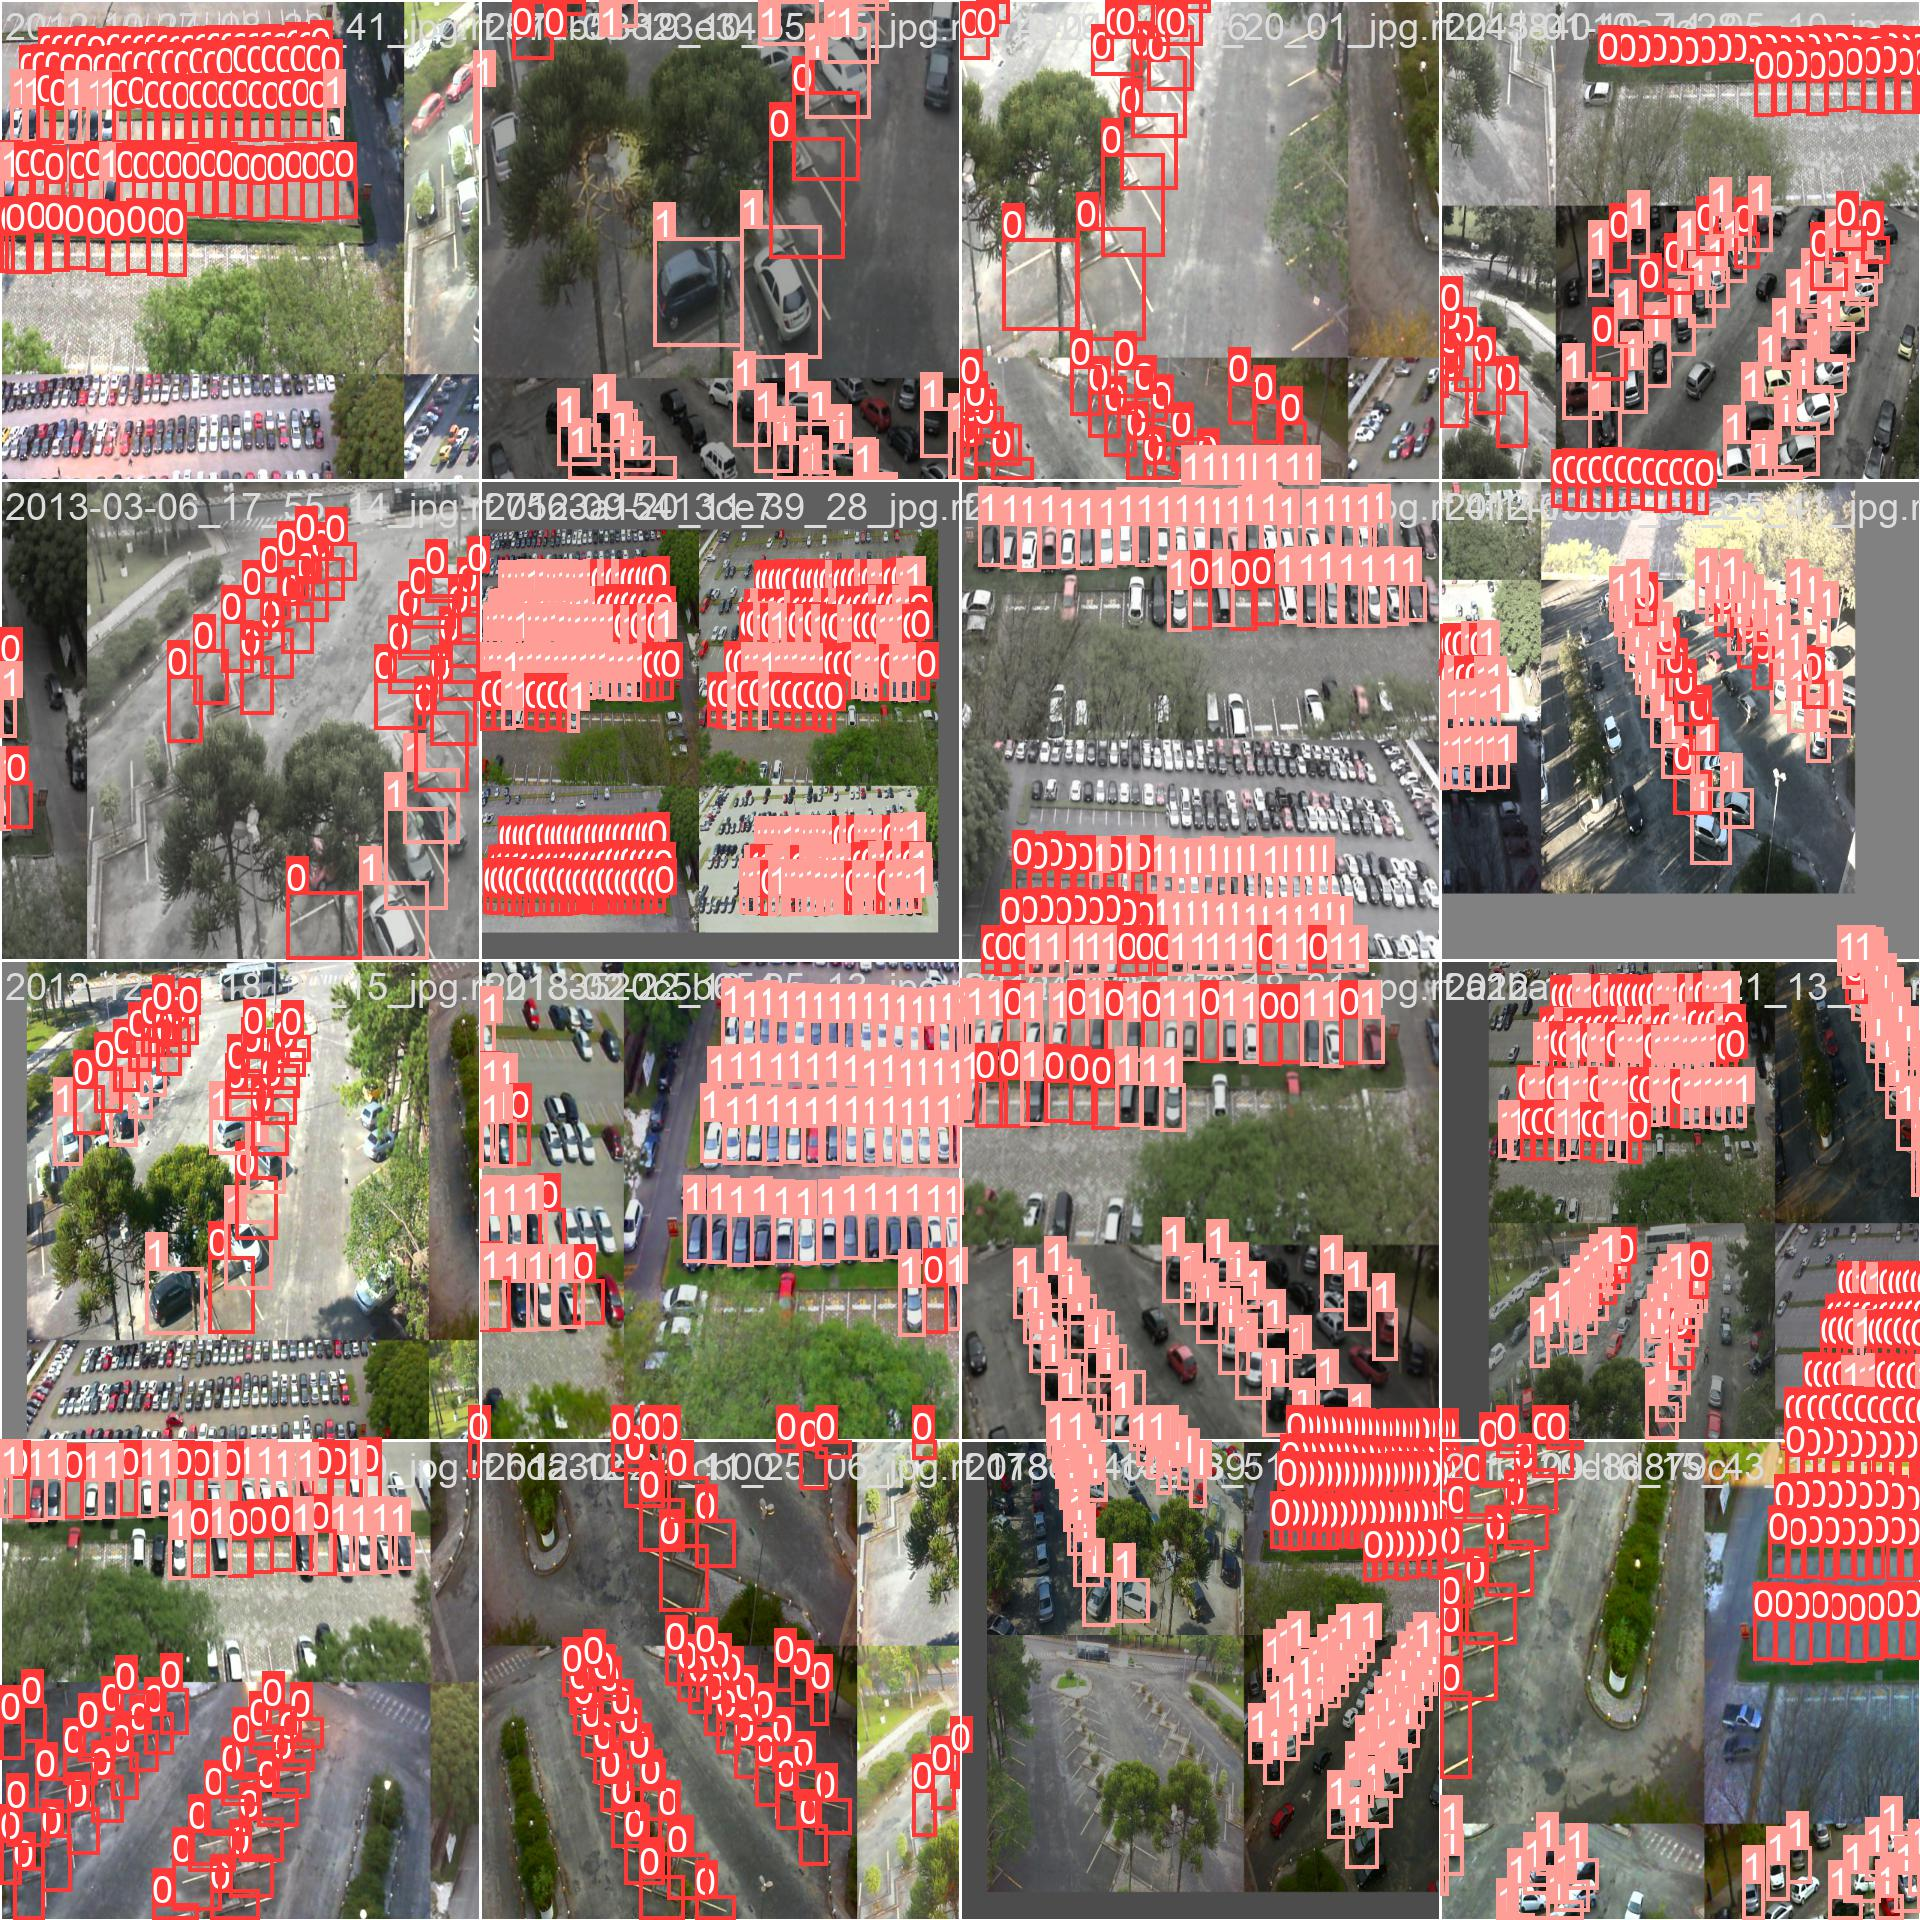

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/train_batch0.jpg',width=1000)

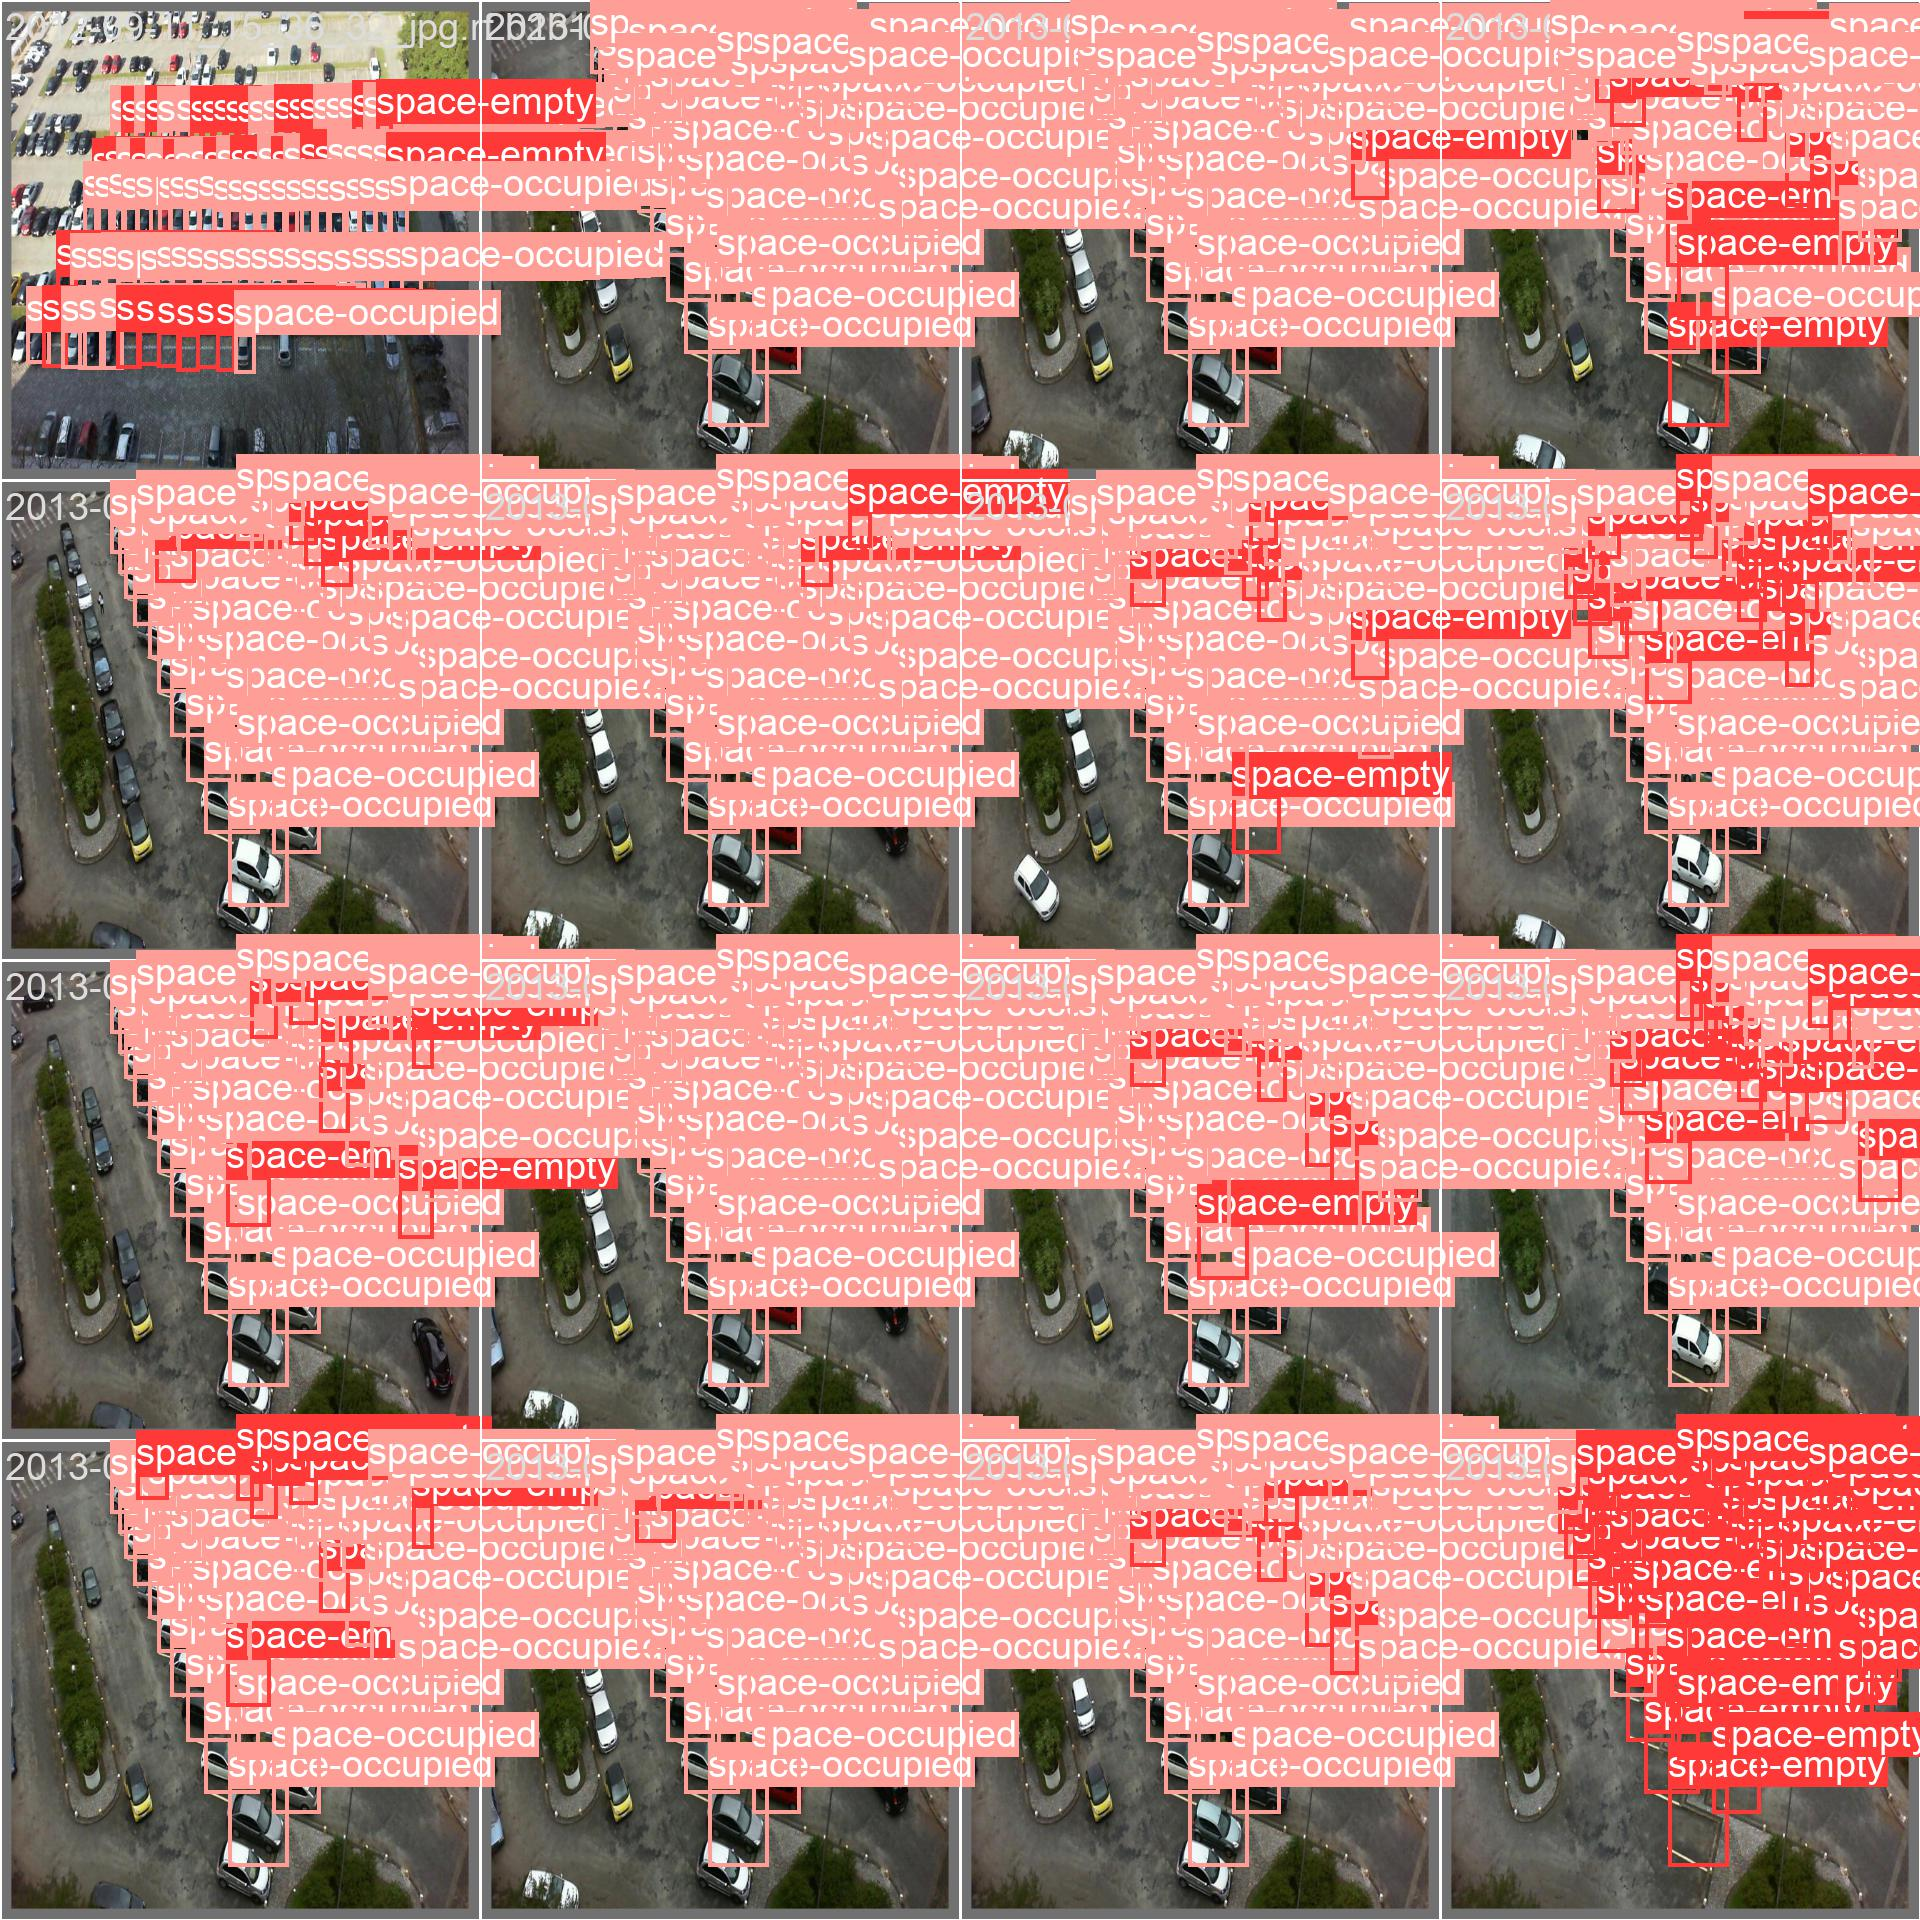

In [ ]:
Image(filename='/content/yolov5/runs/train/pklot_results/val_batch0_labels.jpg',width=1000)

In [ ]:
# 검증
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --iou 0.65 

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pklot/valid/labels.cache... 2483 images, 59 backgrounds, 0 corrupt: 100% 2483/2483 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   3% 2/78 [00:07<05:04,  4.00s/it]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   4% 3/78 [00:11<05:12,  4.16s/it]WARNING ⚠️ NMS time limi

In [ ]:
# 검증
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --iou 0.65 --half

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pklot/valid/labels.cache... 2483 images, 59 backgrounds, 0 corrupt: 100% 2483/2483 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 78/78 [01:12<00:00,  1.07it/s]
                   all       2483     143316      0.998      0.997      0.995      0.933
           space-empty       2483      73629      0.998      0.996      0.995      0.936
        spa

In [ ]:
# --task 설정 안해주면 default롤 'val'이 적용된다.
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --task test

val: data=./pklot/data.yaml, weights=['runs/train/pklot_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/pklot/test/labels... 1242 images, 26 backgrounds, 0 corrupt: 100% 1242/1242 [00:00<00:00, 5948.23it/s]
test: New cache created: /content/yolov5/pklot/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   5% 2/39 [00:07<02:23,  3.89s/it]WARNING ⚠️ NMS time limit 2.100s exceeded
                 Class     Images  Instances          P          R      mAP50  

In [ ]:
# 추론
!python detect.py --weights runs/train/pklot_results/weights/best.pt --img 640 --conf 0.4 --source ./pklot/test/images

detect: weights=['runs/train/pklot_results/weights/best.pt'], source=./pklot/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1242 /content/yolov5/pklot/test/images/2012-09-11_15_53_00_jpg.rf.8282544a640a23df05bd245a9210e663.jpg: 640x640 29 space-emptys, 72 space-occupieds, 12.6ms
image 2/1242 /content/yolov5/pklot/test/images/2012-09-11_16_48_36_jpg.rf.4ecc8c87c61680ccc73edc218a2c8d7d.jpg: 640x640 25 space-emptys, 75 space-occupieds, 12.7ms
i

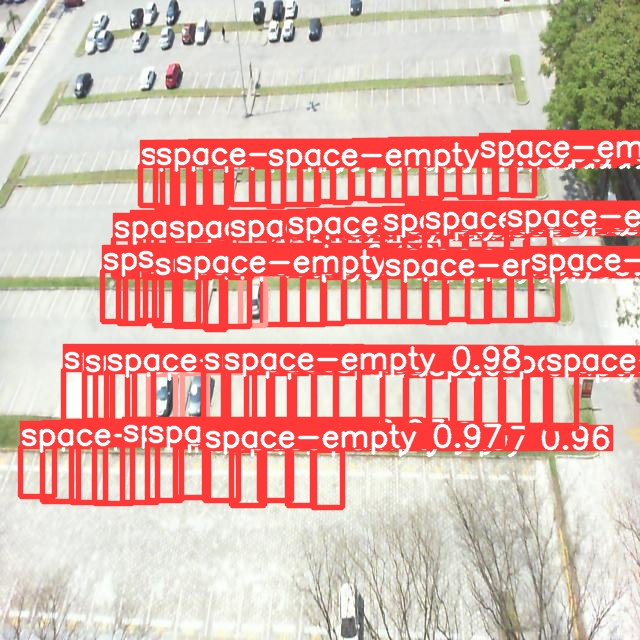

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
# 모델 내보내기

%cp /content/yolov5/runs/train/pklot_results/weights/best.pt /content/drive/MyDrive/cakd8/강의/vision/best2.pt

In [ ]:
# 저장된 모델 불러오기
%cp /content/drive/MyDrive/cakd8/강의/vision/best2.pt /content/yolov5

In [ ]:
# 저장된 모델로 detecting
!python detect.py --weights best2.pt --img 640 --conf 0.25 --source pklot/test/images